# An example of running the METS-R SIM interactively

# Section 1: Start, reset and terminate the simulation

In [1]:
from utils.util import *
from clients.METSRClient import METSRClient

In [2]:
config = read_run_config("configs/run_cosim_CARLAT5_docker.json")
config.verbose = True # set to True to see the message

In [3]:
# os.chdir("docker")
# os.system("docker-compose up -d")
# os.chdir("..")

# time.sleep(10) # wait 10s for the Kafka servers to be up

sim_dirs = prepare_sim_dirs(config)
run_simulation_in_docker(config)

print(sim_dirs)

Container ID: 16d3174150cf7051bc4318693443e6fd3dc1050955f51213d8770e42dd7ae001

Error msg: 
['output/CARLA_20250319_230918_seed_42']


In [4]:
client = METSRClient(host="localhost", sim_folder=sim_dirs[0], port=4000, verbose=True)

Attempt to connect to ws://localhost:4000 failed. Waiting for 10 seconds before trying again... (5 attempts remaining)
Connected to ws://localhost:4000
('2025-03-19 23:09:38', 'RECEIVED', (('TYPE', 'ANS_ready'),))
('2025-03-19 23:09:38', 'RECEIVED', (('TICK', 0), ('TYPE', 'STEP')))


In [5]:
# start the visualization server so the trajectory can be visualized at https://engineering.purdue.edu/HSEES/METSRVis/
client.start_viz()

Serving output/CARLA_20250319_230918_seed_42/trajectory_output\2025-03-19-1009-27 with CORS enabled on port 8000...


In [6]:
# Generating 1000 trips in 5000 ticks.
for i in range(5000):
      if(i % 10 == 0):
            client.generate_trip(i, -1, -1)
      client.tick(1)

('2025-03-19 23:09:38', 'SENT', (('TYPE', 'CTRL_generateTrip'), ('DATA', [{'vehID': 0, 'orig': -1, 'dest': -1}])))
('2025-03-19 23:09:38', 'RECEIVED', (('CODE', 'OK'), ('DATA', [{'STATUS': 'OK', 'origin': 11, 'destination': 20, 'ID': 0}]), ('TYPE', 'CTRL_generateTrip')))
('2025-03-19 23:09:38', 'SENT', (('TYPE', 'STEP'), ('TICK', 0), ('NUM', 1)))
('2025-03-19 23:09:38', 'RECEIVED', (('TICK', 1), ('TYPE', 'STEP')))
('2025-03-19 23:09:38', 'SENT', (('TYPE', 'STEP'), ('TICK', 1), ('NUM', 1)))
('2025-03-19 23:09:38', 'RECEIVED', (('TICK', 2), ('TYPE', 'STEP')))
('2025-03-19 23:09:38', 'SENT', (('TYPE', 'STEP'), ('TICK', 2), ('NUM', 1)))
('2025-03-19 23:09:38', 'RECEIVED', (('TICK', 3), ('TYPE', 'STEP')))
('2025-03-19 23:09:38', 'SENT', (('TYPE', 'STEP'), ('TICK', 3), ('NUM', 1)))
('2025-03-19 23:09:38', 'RECEIVED', (('TICK', 4), ('TYPE', 'STEP')))
('2025-03-19 23:09:38', 'SENT', (('TYPE', 'STEP'), ('TICK', 4), ('NUM', 1)))
('2025-03-19 23:09:38', 'RECEIVED', (('TICK', 5), ('TYPE', 'STEP'))

In [7]:
# reset the simulation using CARLA Town05's map
client.reset_map("CARLA")

('2025-03-19 23:09:58', 'SENT', (('TYPE', 'CTRL_reset'), ('propertyFile', 'Data.properties.CARLA')))
('2025-03-19 23:09:59', 'RECEIVED', (('CODE', 'OK'), ('TYPE', 'CTRL_reset')))
('2025-03-19 23:09:59', 'SENT', (('TYPE', 'STEP'), ('TICK', -1), ('NUM', 1)))
('2025-03-19 23:10:08', 'RECEIVED', (('TICK', 0), ('TYPE', 'STEP')))
Visualization server stopped.
Serving output/CARLA_20250319_230918_seed_42/trajectory_output\2025-03-19-1009-59 with CORS enabled on port 8000...


In [8]:
# This is doing the same thing as above, but in a more efficient way
for i in range(500):
      client.generate_trip(i, -1, -1)
      client.tick(10)

('2025-03-19 23:10:10', 'SENT', (('TYPE', 'CTRL_generateTrip'), ('DATA', [{'vehID': 0, 'orig': -1, 'dest': -1}])))
('2025-03-19 23:10:10', 'RECEIVED', (('CODE', 'OK'), ('DATA', [{'STATUS': 'OK', 'origin': 13, 'destination': 4, 'ID': 0}]), ('TYPE', 'CTRL_generateTrip')))
('2025-03-19 23:10:10', 'SENT', (('TYPE', 'STEP'), ('TICK', 0), ('NUM', 10)))
('2025-03-19 23:10:10', 'RECEIVED', (('TICK', 10), ('TYPE', 'STEP')))
('2025-03-19 23:10:10', 'SENT', (('TYPE', 'CTRL_generateTrip'), ('DATA', [{'vehID': 1, 'orig': -1, 'dest': -1}])))
('2025-03-19 23:10:10', 'RECEIVED', (('CODE', 'OK'), ('DATA', [{'STATUS': 'OK', 'origin': 1, 'destination': 5, 'ID': 1}]), ('TYPE', 'CTRL_generateTrip')))
('2025-03-19 23:10:10', 'SENT', (('TYPE', 'STEP'), ('TICK', 10), ('NUM', 10)))
('2025-03-19 23:10:10', 'RECEIVED', (('TICK', 20), ('TYPE', 'STEP')))
('2025-03-19 23:10:10', 'SENT', (('TYPE', 'CTRL_generateTrip'), ('DATA', [{'vehID': 2, 'orig': -1, 'dest': -1}])))
('2025-03-19 23:10:10', 'RECEIVED', (('CODE', '

In [9]:
# one can close the connection without terminating the simulation
client.close()

# and reestablish the connection ideally from the other machine
client = METSRClient(host="localhost", sim_folder=sim_dirs[0], port=4000, verbose=True)

Visualization server stopped.
Connected to ws://localhost:4000
('2025-03-19 23:10:26', 'RECEIVED', (('TICK', 5000), ('TYPE', 'STEP')))


In [10]:
client.reset_map("CARLA")

('2025-03-19 23:10:26', 'SENT', (('TYPE', 'CTRL_reset'), ('propertyFile', 'Data.properties.CARLA')))
('2025-03-19 23:10:26', 'RECEIVED', (('CODE', 'OK'), ('TYPE', 'CTRL_reset')))
('2025-03-19 23:10:26', 'SENT', (('TYPE', 'STEP'), ('TICK', -1), ('NUM', 1)))
('2025-03-19 23:10:36', 'RECEIVED', (('TICK', 0), ('TYPE', 'STEP')))


In [11]:
# generate trips between roads
import random
road_ids = client.query_road()
road_ids

('2025-03-19 23:10:36', 'SENT', (('TYPE', 'QUERY_road'),))
('2025-03-19 23:10:36', 'RECEIVED', (('id_list', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]), ('orig_id', ['-0', '-1', '-10', '-11', '-13', '-14', '-16', '-18', '-19', '-2', '-20', '-21', '-22', '-23', '-24', '-26', '-27', '-28', '-29', '-3', '-30', '-32', '-36', '-38', '-39', '-4', '-41', '-42', '-43', '-44', '-45', '-46', '-47', '-48', '-5', '-50', '-51', '-52', '-6', '-7', '-8', '-9', '0', '1', '10', '11', '13', '15', '17', '19', '2', '20', '21', '22', '23', '24', '25', '27', '28', '3', '31', '33', '35', '37', '39', '4', '40', '41', '42', '43', '44', '45', '46', '48', '49', '51', '6', '7', '8', '9']), ('TYPE', 'ANS_road')))


{'id_list': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80],
 'orig_id': ['-0',
  '-1',
  '-10',
  '-11',
  '-13',
  '-14',
  '-16',
  '-18',
  '-19',
  '-2',
  '-20',
  '-21',
  '-22',
  '-23',
  '-24',
  '-26',
  '-27',
  '-28',
  '-29',
  '-3',
  '-30',
  '-32',
  '-36',
  '-38',
  '-39',
  '-4',
  '-41',
  '-42',
  '-43',
  '-44',
  '-45',
  '-46',
  '-47',
  '-48',
  '-5',
  '-50',
  '-51',
  '-52',
  '-6',
  '-7',
  '-8',
  '-9',
  '0',
  '1',
  '10',
  '11',
  '13',
  '15',
  '17',
  '19',
  '2',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '27',
  '28',
  '3'

In [12]:
for i in range(500):
      client.tick(10)
      origin_road = random.choice(road_ids['orig_id'])
      destination_road = random.choice(road_ids['orig_id'])
      client.generate_trip_between_roads(i, origin_road, destination_road)

('2025-03-19 23:10:36', 'SENT', (('TYPE', 'STEP'), ('TICK', 0), ('NUM', 10)))
('2025-03-19 23:10:36', 'RECEIVED', (('TICK', 10), ('TYPE', 'STEP')))
('2025-03-19 23:10:36', 'SENT', (('TYPE', 'CTRL_genTripBwRoads'), ('DATA', [{'vehID': 0, 'orig': '9', 'dest': '0'}])))
('2025-03-19 23:10:36', 'RECEIVED', (('CODE', 'OK'), ('DATA', [{'STATUS': 'OK', 'origin': '9', 'destination': '0', 'vehID': 0}]), ('TYPE', 'CTRL_genTripBwRoads')))
('2025-03-19 23:10:36', 'SENT', (('TYPE', 'STEP'), ('TICK', 10), ('NUM', 10)))
('2025-03-19 23:10:36', 'RECEIVED', (('TICK', 20), ('TYPE', 'STEP')))
('2025-03-19 23:10:36', 'SENT', (('TYPE', 'CTRL_genTripBwRoads'), ('DATA', [{'vehID': 1, 'orig': '-14', 'dest': '-19'}])))
('2025-03-19 23:10:36', 'RECEIVED', (('CODE', 'OK'), ('DATA', [{'STATUS': 'OK', 'origin': '-14', 'destination': '-19', 'vehID': 1}]), ('TYPE', 'CTRL_genTripBwRoads')))
('2025-03-19 23:10:36', 'SENT', (('TYPE', 'STEP'), ('TICK', 20), ('NUM', 10)))
('2025-03-19 23:10:36', 'RECEIVED', (('TICK', 30),

In [13]:
# stop the visualization server, note visualization server is already stopped when the previous client is closed so nothing is going to be printed
client.stop_viz()

In [14]:
# terminate the simulation
client.terminate()

('2025-03-19 23:10:43', 'SENT', (('TYPE', 'CTRL_end'),))
('2025-03-19 23:10:43', 'RECEIVED', (('CODE', 'OK'), ('TYPE', 'CTRL_end')))


# Section 2: Query APIs

In this example, we will see how to use query to extract data from the simulation.

In [36]:
from utils.util import *
from clients.METSRClient import METSRClient

In [37]:
config = read_run_config("configs/run_interactive_NYC_docker.json")
config.verbose = True # set to True to see the message

In [38]:
sim_dirs = prepare_sim_dirs(config)
run_simulation_in_docker(config)

print(sim_dirs)


No port number specified, find available ports for simulation instances
Container ID: d9856474c18b3c2145dd655b28a35f1b5873cdaf35ce2053d509398a8916a531

Error msg: 
['output/scenario_0_case_0_seed_42_eco_False_bus_False_share_False_demand_10_taxi_2000_bus_20_10']


In [39]:
# If no metsr_port is specified, the runner will find the port automatically 
config.ports

[60624]

In [40]:
# Better to  set up a larger timeout (default is 30s) if your map/vehicle number is huge
sim_client = METSRClient(host="localhost", sim_folder=sim_dirs[0], port = config.ports[0], verbose=False, timeout=300) 

Attempt to connect to ws://localhost:60624 failed. Waiting for 10 seconds before trying again... (5 attempts remaining)


In [41]:
# Great! Now we run the simulation for 1 h (0.2s/tick correspond to the real world time) and then query the data
# Since this one is going to take a little bit longer, we set wait_forever to True
sim_client.tick(18000, wait_forever=True)

Now let's do some query.

In [42]:
# if no vehicle id is specified, a list of all buses will be returned
sim_client.query_bus()

{'id_list': [37729,
  37730,
  37731,
  37732,
  37733,
  37734,
  37735,
  37736,
  37737,
  37738,
  37739,
  37740,
  37741,
  37742,
  37743,
  37744,
  37745,
  37746],
 'TYPE': 'ANS_bus'}

In [43]:
# this vehicle has not departed yet, so it will return current_stop = -1
sim_client.query_bus(37732)

{'DATA': [{'battery_state': 214.9341706856638,
   'route': 1140012,
   'current_stop': 0,
   'pass_num': 0,
   'ID': 37732,
   'stop_list': [113728,
    112704,
    112942,
    113714,
    113824,
    114048,
    114149,
    114291,
    114335,
    114760,
    115215,
    115289,
    115423,
    115450,
    115593,
    115616,
    115637,
    112133,
    112136,
    112140,
    112147,
    112160,
    112184,
    112161,
    111775,
    111777,
    111779,
    111784,
    111794,
    111808,
    120667,
    111807,
    120720,
    120984,
    121586,
    122014,
    122295,
    121580,
    112319]}],
 'TYPE': 'ANS_bus'}

In [44]:
# this one has entered the second
sim_client.query_bus(37742)

{'DATA': [{'battery_state': 113.84272545992674,
   'route': 1640001,
   'current_stop': 2,
   'pass_num': 1,
   'ID': 37742,
   'stop_list': [124368,
    124505,
    124611,
    124454,
    124622,
    124580,
    124674,
    124764,
    124871,
    101578,
    125212,
    101405,
    100973,
    100978,
    100976,
    100940,
    100945,
    100955,
    100718,
    101010,
    100676,
    100694,
    100719,
    101747,
    101773,
    101785,
    101797,
    100840,
    102287,
    102484,
    103374,
    102640,
    103123,
    102402,
    103314,
    103836,
    104355,
    104690,
    104794,
    103238,
    104005,
    103441,
    104134,
    104646,
    104466,
    104685,
    104332,
    104682,
    104829,
    105045,
    104844,
    104749,
    104819,
    103517,
    103996,
    104610,
    104454,
    104303,
    102732,
    103509,
    102646,
    101594,
    101596,
    101598,
    101600,
    101655,
    101661,
    100082,
    102407]}],
 'TYPE': 'ANS_bus'}

In [45]:
# similarly, one can query taxis
sim_client.query_taxi()

{'id_list': [36864,
  36865,
  36866,
  36867,
  36868,
  36869,
  36870,
  36871,
  36872,
  36873,
  36874,
  36875,
  36876,
  36877,
  36878,
  36879,
  36880,
  36881,
  36882,
  36883,
  36884,
  36885,
  36886,
  36887,
  36888,
  36889,
  36890,
  36891,
  36892,
  36893,
  36894,
  36895,
  36896,
  36897,
  36898,
  36899,
  36900,
  36901,
  36902,
  36903,
  36904,
  36905,
  36906,
  36907,
  36908,
  36909,
  36910,
  36911,
  36912,
  36913,
  36914,
  36915,
  36916,
  36917,
  36918,
  36919,
  36920,
  36921,
  36922,
  36923,
  36924,
  36925,
  36926,
  36927,
  36928,
  36929,
  36930,
  36931,
  36932,
  36933,
  36934,
  36935,
  36936,
  36937,
  36938,
  36939,
  36940,
  36941,
  36942,
  36943,
  36944,
  36945,
  36946,
  36947,
  36948,
  36949,
  36950,
  36951,
  36952,
  36953,
  36954,
  36955,
  36956,
  36957,
  36958,
  36959,
  36960,
  36961,
  36962,
  36963,
  36964,
  36965,
  36966,
  36967,
  36968,
  36969,
  36970,
  36971,
  36972,
  36973,

In [46]:
# This vehicle is in state 0, meaning it is parking
sim_client.query_taxi(36874)

{'DATA': [{'pass_num': 0,
   'origin': 140,
   'x': -73.86672311909687,
   'y': 40.770925432411005,
   'ID': 36874,
   'state': 0,
   'dest': 140}],
 'TYPE': 'ANS_taxi'}

In [47]:
# Find a taxi, which is carrying passengers
for i in sim_client.query_taxi()['id_list']:
      res = sim_client.query_taxi(i)
      if res['DATA'][0]['pass_num']>0:
            print(res)
            break

{'DATA': [{'pass_num': 1, 'origin': 142, 'x': -73.99775488786999, 'y': 40.71679523410359, 'ID': 37188, 'state': 6, 'dest': 142}], 'TYPE': 'ANS_taxi'}


In [48]:
# One can also query the facilities in the simulation
sim_client.query_road()['orig_id']

['100001',
 '100000',
 '100003',
 '100002',
 '100005',
 '100004',
 '100007',
 '100006',
 '100009',
 '100008',
 '100011',
 '100010',
 '100013',
 '100012',
 '100015',
 '100014',
 '100017',
 '100016',
 '100019',
 '100018',
 '100021',
 '100020',
 '100023',
 '100022',
 '100025',
 '100024',
 '100027',
 '100026',
 '100029',
 '100028',
 '100031',
 '100030',
 '100033',
 '100032',
 '100035',
 '100034',
 '100037',
 '100036',
 '100039',
 '100038',
 '100041',
 '100040',
 '100043',
 '100042',
 '100045',
 '100044',
 '100047',
 '100046',
 '100049',
 '100048',
 '100051',
 '100050',
 '100053',
 '100052',
 '100055',
 '100054',
 '100057',
 '100056',
 '100059',
 '100058',
 '100061',
 '100060',
 '100063',
 '100062',
 '100065',
 '100064',
 '100067',
 '100066',
 '100069',
 '100068',
 '100071',
 '100070',
 '100073',
 '100072',
 '100075',
 '100074',
 '100077',
 '100076',
 '100079',
 '100078',
 '100081',
 '100080',
 '100083',
 '100082',
 '100085',
 '100084',
 '100087',
 '100086',
 '100089',
 '100088',
 '100091',

In [49]:
# This id can be found in the road csv (or SUMO XML) in the data folder
sim_client.query_road('100017')

{'DATA': [{'speed_limit': 31.2928,
   'num_veh': 0,
   'avg_travel_time': 0.5947308715648983,
   'length': 18.61079421770605,
   'ID': '100017',
   'TYPE': 'ANS_road',
   'energy_consumed': 0.0,
   'r_type': 1}],
 'TYPE': 'ANS_road'}

In [50]:
# Also, a list of ID can be used to query multiple roads
sim_client.query_road(sim_client.query_road()['orig_id'][:5])

{'DATA': [{'speed_limit': 31.2928,
   'num_veh': 0,
   'avg_travel_time': 1.556794535261317,
   'length': 48.71646003302534,
   'ID': '100001',
   'TYPE': 'ANS_road',
   'energy_consumed': 0.0,
   'r_type': 1},
  {'speed_limit': 31.2928,
   'num_veh': 0,
   'avg_travel_time': 1.684755459937161,
   'length': 52.720715656721595,
   'ID': '100000',
   'TYPE': 'ANS_road',
   'energy_consumed': 0.0,
   'r_type': 1},
  {'speed_limit': 31.2928,
   'num_veh': 0,
   'avg_travel_time': 2.518995638708525,
   'length': 78.82642672297813,
   'ID': '100003',
   'TYPE': 'ANS_road',
   'energy_consumed': 0.0,
   'r_type': 1},
  {'speed_limit': 31.2928,
   'num_veh': 0,
   'avg_travel_time': 4.355126698188949,
   'length': 136.28410874108712,
   'ID': '100002',
   'TYPE': 'ANS_road',
   'energy_consumed': 0.0,
   'r_type': 1},
  {'speed_limit': 31.2928,
   'num_veh': 0,
   'avg_travel_time': 1.0036263249924842,
   'length': 31.40627786272481,
   'ID': '100005',
   'TYPE': 'ANS_road',
   'energy_consume

In [51]:
sim_client.query_signal()

{'id_list': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,


In [52]:
sim_client.query_signal(2)

{'DATA': [{'nex_state': 0, 'next_update_time': 18900, 'ID': 2, 'state': 2}],
 'TYPE': 'ANS_signal'}

In [53]:
sim_client.query_chargingStation()

{'id_list': [-1,
  -2,
  -3,
  -4,
  -5,
  -6,
  -7,
  -8,
  -9,
  -10,
  -11,
  -12,
  -13,
  -14,
  -15,
  -16,
  -17,
  -18,
  -19,
  -20,
  -21,
  -22,
  -23,
  -24,
  -25,
  -26,
  -27,
  -28,
  -29,
  -30,
  -31,
  -32,
  -33,
  -34,
  -35,
  -36,
  -37,
  -38,
  -39,
  -40,
  -41,
  -42,
  -43,
  -44,
  -45,
  -46,
  -47,
  -48,
  -49,
  -50,
  -51,
  -52,
  -53,
  -54,
  -55,
  -56,
  -57,
  -58,
  -59,
  -60,
  -61,
  -62,
  -63,
  -64,
  -65,
  -66,
  -67,
  -68,
  -69,
  -70,
  -71,
  -72,
  -73,
  -74,
  -75,
  -76,
  -77,
  -78,
  -79,
  -80,
  -81,
  -82,
  -83,
  -84,
  -85,
  -86,
  -87,
  -88,
  -89,
  -90,
  -91,
  -92,
  -93,
  -94,
  -95,
  -96,
  -97,
  -98,
  -99,
  -100,
  -101,
  -102,
  -103,
  -104,
  -105,
  -106,
  -107,
  -108,
  -109,
  -110,
  -111,
  -112,
  -113,
  -114,
  -115,
  -116,
  -117,
  -118,
  -119,
  -120,
  -121,
  -122,
  -123,
  -124,
  -125,
  -126,
  -127,
  -128,
  -129,
  -130,
  -131,
  -132,
  -133,
  -134,
  -135,
  -136,
  -137,
 

In [54]:
sim_client.query_chargingStation(-3)

{'DATA': [{'num_available_charger': 10,
   'x': -73.97696969679413,
   'y': 40.72376040114996,
   'ID': -3}],
 'TYPE': 'ANS_chargingStation'}

Cool, we have went through the query APIs. Let's see how it can be used.

In [55]:
# Let's restart the simulation
sim_client.reset_map("NYC")

In [56]:
xs, ys = [], []
taxi_demand, bus_demand, taxi_stock = [], [], []

# Run a 2-hour simulation, record the trajectory every 1s, and monitor the demand every 60s 
for i in range(7200):
      query_res = sim_client.query_taxi(37188)
      xs.append(query_res['DATA'][0]['x'])
      ys.append(query_res['DATA'][0]['y'])

      if i % 60 == 0:
            taxi_demand.append(sim_client.query_zone(140)['DATA'][0]['taxi_demand'])
            bus_demand.append(sim_client.query_zone(140)['DATA'][0]['bus_demand'])
            taxi_stock.append(sim_client.query_zone(140)['DATA'][0]['veh_stock'])

      sim_client.tick(5)

In [57]:
# !pip install contextily
# !pip install geopandas

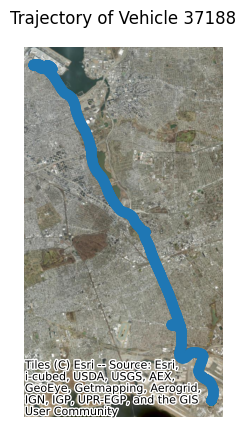

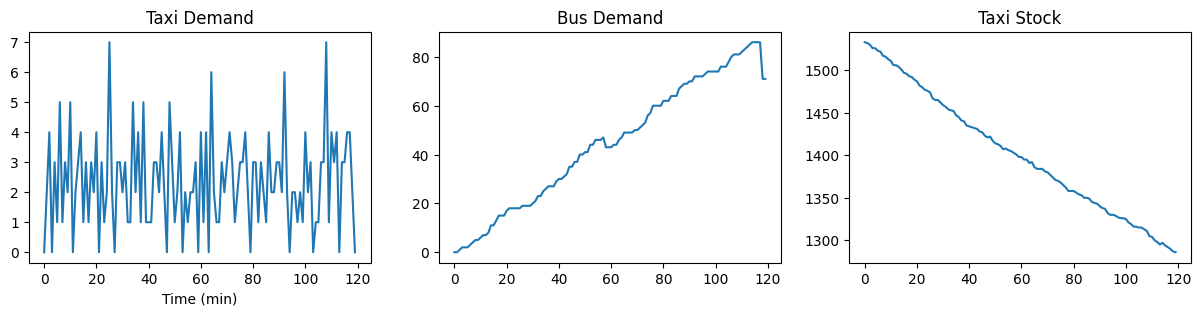

In [58]:
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd

# Example 1: Collect and visualize the trajectory of one vehicle
fig, ax = plt.subplots()

# add the NYC map
gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(xs, ys), crs='EPSG:4326').to_crs(epsg=3857)
gdf.plot(ax = ax)
ax.set_title("Trajectory of Vehicle 37188")
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

ax.set_axis_off()

plt.show()

# Example 2: Minitor the state of a zone
fig, axs = plt.subplots(1,3, figsize=(15,3), sharex = True)

# The first two hours are 0-2:00, so the demand is low
axs[0].plot(taxi_demand)
axs[0].set_title("Taxi Demand")

axs[1].plot(bus_demand)
axs[1].set_title("Bus Demand")

axs[2].plot(taxi_stock)
axs[2].set_title("Taxi Stock")
for i in range(3):
      axs[0].set_xlabel("Time (min)")

plt.show()

In [59]:
sim_client.terminate()

# Section 3: Control APIs

In this section, we will see how to interact with the simulation.

In [1]:
from utils.util import *
from clients.METSRClient import METSRClient

In [2]:
config = read_run_config("configs/run_interactive_NYC_docker.json")
config.verbose = True # set to True to see the message

In [3]:
sim_dirs = prepare_sim_dirs(config)
run_simulation_in_docker(config)

print(sim_dirs)

No port number specified, find available ports for simulation instances
Container ID: 8e3f6a5a7d5358853ab3ce509cf229c53af7b393bbf041af87320e0626448c9a

Error msg: 
['output/scenario_0_case_0_seed_42_eco_False_bus_False_share_False_demand_10_taxi_2000_bus_20_10']


In [4]:
client = METSRClient(host="localhost", sim_folder=sim_dirs[0], port=config.ports[0], verbose=False, timeout=300)

Attempt to connect to ws://localhost:62057 failed. Waiting for 10 seconds before trying again... (5 attempts remaining)


In [5]:
# no private vehicle is in the simulation yet
client.query_vehicle(private_veh = True)['private_vids']

[]

In [6]:
# generate a private vehicle trip
client.generate_trip(0, -1, -1)

{'CODE': 'OK',
 'DATA': [{'STATUS': 'OK', 'origin': 57, 'destination': 91, 'ID': 0}],
 'TYPE': 'CTRL_generateTrip'}

In [7]:
# state 8 means the vehicle is performing a private trip
client.query_vehicle(0, private_veh = True)

{'DATA': [{'acc': 0.0,
   'bearing': 0.0,
   'x': -73.88161730474339,
   'y': 40.838003024955036,
   'ID': 7,
   'state': 8,
   'v_type': 3,
   'speed': 0.0}],
 'TYPE': 'ANS_vehicle'}

In [8]:
# can also generate a private vehicle trip between two roads
import random
road_ids = client.query_road()
origin_road = random.choice(road_ids['orig_id'])
destination_road = random.choice(road_ids['orig_id'])

client.generate_trip_between_roads(1, origin_road, destination_road)

{'CODE': 'OK',
 'DATA': [{'STATUS': 'OK',
   'origin': '116330',
   'destination': '114848',
   'vehID': 1}],
 'TYPE': 'CTRL_genTripBwRoads'}

In [9]:
client.query_vehicle(1, private_veh = True)

{'DATA': [{'acc': 0.0,
   'bearing': 0.0,
   'x': -73.88369363054755,
   'y': 40.76719007271061,
   'ID': 8,
   'state': 8,
   'v_type': 3,
   'speed': 0.0}],
 'TYPE': 'ANS_vehicle'}

In [10]:
# generate a taxi trip with specific vehicles
client.dispatch_taxi(36864, 140, 180, 2)

{'CODE': 'OK',
 'DATA': [{'STATUS': 'OK', 'ID': 36864}],
 'TYPE': 'CTRL_dispatchTaxi'}

In [11]:
# We see the veh's destination is still 140, this is because it is in a pickup trip (state 6)
client.query_taxi(36864)

{'DATA': [{'pass_num': 2,
   'origin': 140,
   'x': -73.86672311909687,
   'y': 40.770925432411005,
   'ID': 36864,
   'state': 6,
   'dest': 140}],
 'TYPE': 'ANS_taxi'}

In [12]:
# let's tick the simulation for 5 mins
client.tick(1500)

In [13]:
# aha, now the vehicle is in a occupied trip (state 1), and its destination is 180
client.query_taxi(36864)

{'DATA': [{'pass_num': 2,
   'origin': 140,
   'x': -73.87035204292697,
   'y': 40.77173924730697,
   'ID': 36864,
   'state': 1,
   'dest': 180}],
 'TYPE': 'ANS_taxi'}

In [14]:
client.query_zone(139)

{'DATA': [{'veh_stock': 0,
   'taxi_demand': 0,
   'bus_demand': 0,
   'x': -73.9537822370563,
   'y': 40.81797514762926,
   'ID': 139,
   'z_type': 0}],
 'TYPE': 'ANS_zone'}

In [15]:
# generate a taxi request without specific vehicles
client.add_taxi_requests(139, 180, 3)

{'CODE': 'OK',
 'DATA': [{'STATUS': 'OK', 'ID': 139}],
 'TYPE': 'CTRL_addTaxiRequests'}

In [16]:
# this will take effect when the next round of demand processing, which happens every 60s in this scenario
client.tick(300)

In [17]:
client.query_zone(139)

{'DATA': [{'veh_stock': 0,
   'taxi_demand': 1,
   'bus_demand': 0,
   'x': -73.9537822370563,
   'y': 40.81797514762926,
   'ID': 139,
   'z_type': 0}],
 'TYPE': 'ANS_zone'}

Note: for taxi requests, one can also use orgin road id and dest road id to eliminate uncertainty.

In [18]:
buses = client.query_bus()['id_list']
buses

[37729,
 37730,
 37731,
 37732,
 37733,
 37734,
 37735,
 37736,
 37737,
 37738,
 37739,
 37740,
 37741,
 37742,
 37743,
 37744,
 37745,
 37746]

In [19]:
# Now, let's tick a little bit longer to let the bus operate
flag = True
while flag:
      client.tick(100)
      for bus in buses:
            if client.query_bus(bus)['DATA'][0]['route'] != -1:
                  print("Tick: ", client.current_tick)
                  print(bus)
                  flag = False
                  break
      if client.current_tick>=20000:
            break

Tick:  3200
37741


In [20]:
# Our target is this bus
client.query_bus(37741)

{'DATA': [{'battery_state': 143.1746450807543,
   'route': 1640000,
   'current_stop': -1,
   'pass_num': 0,
   'ID': 37741,
   'stop_list': [180, 229, 131, 175, 180]}],
 'TYPE': 'ANS_bus'}

In [21]:
# generate a bus trip with specific vehicles
client.assign_request_to_bus(37741, 229, 175, 1)

{'CODE': 'OK',
 'DATA': [{'STATUS': 'OK', 'ID': 37741}],
 'TYPE': 'CTRL_assignRequestToBus'}

In [22]:
# this bus has not departed yet
client.query_bus(37741)

{'DATA': [{'battery_state': 143.1746450807543,
   'route': 1640000,
   'current_stop': -1,
   'pass_num': 0,
   'ID': 37741,
   'stop_list': [180, 229, 131, 175, 180]}],
 'TYPE': 'ANS_bus'}

In [23]:
# wait until the bus arrives at the first stop
while True:
      client.tick(1000, wait_forever = True)
      if client.query_bus(37741)['DATA'][0]['current_stop'] == 0:
            break

In [24]:
client.query_bus(37741)

{'DATA': [{'battery_state': 142.2569910759098,
   'route': 1640000,
   'current_stop': 0,
   'pass_num': 0,
   'ID': 37741,
   'stop_list': [180, 229, 131, 175, 180]}],
 'TYPE': 'ANS_bus'}

In [25]:
# wait until the bus arrives at the second stop
while True:
      client.tick(1000, wait_forever = True)
      if client.query_bus(37741)['DATA'][0]['current_stop'] == 1:
            break

In [26]:
# aha, we see the added request 
client.query_bus(37741)

{'DATA': [{'battery_state': 139.2019177242657,
   'route': 1640000,
   'current_stop': 1,
   'pass_num': 1,
   'ID': 37741,
   'stop_list': [180, 229, 131, 175, 180]}],
 'TYPE': 'ANS_bus'}

In [27]:
# now let's try another way to add a bus request
client.query_zone(175)

{'DATA': [{'veh_stock': 0,
   'taxi_demand': 0,
   'bus_demand': 1,
   'x': -73.98141374048745,
   'y': 40.670374325917045,
   'ID': 175,
   'z_type': 0}],
 'TYPE': 'ANS_zone'}

In [28]:
# generate a bus trip with nonspecific vehicles
client.add_bus_requests(175, 180, 1)

{'CODE': 'OK',
 'DATA': [{'STATUS': 'OK', 'ID': 175}],
 'TYPE': 'CTRL_addBusRequests'}

In [29]:
# wait 60s for the demand to be processed
client.tick(300)

In [30]:
client.query_zone(175)

{'DATA': [{'veh_stock': 0,
   'taxi_demand': 0,
   'bus_demand': 2,
   'x': -73.98141374048745,
   'y': 40.670374325917045,
   'ID': 175,
   'z_type': 0}],
 'TYPE': 'ANS_zone'}

In [31]:
# let's teleport the bus!
client.query_vehicle(37741, private_veh = False)

{'DATA': [{'acc': 0.1645513209791439,
   'road': '100451',
   'bearing': 118.93823855324955,
   'x': -73.99028012073614,
   'y': 40.74091976923106,
   'dist': 18.590367716707952,
   'ID': 37741,
   'state': 0,
   'v_type': 2,
   'speed': 6.028560775779815,
   'lane': 0}],
 'TYPE': 'ANS_vehicle'}

In [32]:
# teleport a vehicle to a specific location (must within the same road), the fourth parameter is the target distance to the next intersection
client.teleport_trace_replay_vehicle(37741, roadID='100451', laneID=0, dist=5.0, private_veh = False)

{'CODE': 'OK',
 'DATA': [{'STATUS': 'OK', 'ID': 37741}],
 'TYPE': 'CTRL_teleportTraceReplayVeh'}

In [ ]:
# okay, the distance has been updated, so as the vehicle's coordinates, yes!
client.query_vehicle(37741, private_veh = False)

{'DATA': [{'acc': 0.1645513209791439,
   'road': '100451',
   'bearing': 118.93824871764804,
   'x': -73.9901276791662,
   'y': 40.74088820483166,
   'dist': 5.0,
   'ID': 37741,
   'state': 0,
   'v_type': 2,
   'speed': 6.028560775779815,
   'lane': 0}],
 'TYPE': 'ANS_vehicle'}

In [34]:
# force the vehicle to take the specified acceleration
client.control_vehicle(37741, 2.0, private_veh = False)

{'CODE': 'OK',
 'DATA': [{'STATUS': 'OK', 'ID': 37741}],
 'TYPE': 'CTRL_controlVeh'}

In [35]:
client.tick(1)

In [36]:
# now check the acceleration, yes! It is almost 2.0
client.query_vehicle(37741, private_veh = False)

{'DATA': [{'acc': 1.999999999999989,
   'road': '100451',
   'bearing': 118.93824871764804,
   'x': -73.99012132927794,
   'y': 40.74088553438243,
   'dist': 4.38714391314074,
   'ID': 37741,
   'state': 0,
   'v_type': 2,
   'speed': 6.2285607787600465,
   'lane': 0}],
 'TYPE': 'ANS_vehicle'}

In [37]:
client.terminate()

There are more control APIs for co-simulation, which can be found in CoSimRunner.py

# Section 4: Data stream

In [1]:
from utils.util import *
from clients.METSRClient import METSRClient
from clients.KafkaDataProcessor import KafkaDataProcessor

In [2]:
config = read_run_config("configs/run_cosim_CARLAT5_docker.json")
config.verbose = False 

In [3]:
os.chdir("docker")
os.system("docker-compose up -d")
os.chdir("..")

time.sleep(10) # wait 10s for the Kafka servers to be up

sim_dirs = prepare_sim_dirs(config)
run_simulation_in_docker(config)

print(sim_dirs)

['output/CARLA_20250320_004615_seed_42']


In [4]:
sim_client = METSRClient(host="localhost", sim_folder=sim_dirs[0], port=4000, verbose=False)

kafkaDataProcessor = KafkaDataProcessor(config)

Attempt to connect to ws://localhost:4000 failed. Waiting for 10 seconds before trying again... (5 attempts remaining)


In [5]:
# First, generate 100 trips
sim_client.generate_trip(list(range(100)), -1, -1)


{'CODE': 'OK',
 'DATA': [{'STATUS': 'OK', 'origin': 20, 'destination': 8, 'ID': 0},
  {'STATUS': 'OK', 'origin': 2, 'destination': 17, 'ID': 1},
  {'STATUS': 'OK', 'origin': 14, 'destination': 17, 'ID': 2},
  {'STATUS': 'OK', 'origin': 9, 'destination': 12, 'ID': 3},
  {'STATUS': 'OK', 'origin': 15, 'destination': 18, 'ID': 4},
  {'STATUS': 'OK', 'origin': 21, 'destination': 14, 'ID': 5},
  {'STATUS': 'OK', 'origin': 13, 'destination': 8, 'ID': 6},
  {'STATUS': 'OK', 'origin': 8, 'destination': 4, 'ID': 7},
  {'STATUS': 'OK', 'origin': 21, 'destination': 11, 'ID': 8},
  {'STATUS': 'OK', 'origin': 13, 'destination': 21, 'ID': 9},
  {'STATUS': 'OK', 'origin': 18, 'destination': 3, 'ID': 10},
  {'STATUS': 'OK', 'origin': 11, 'destination': 3, 'ID': 11},
  {'STATUS': 'OK', 'origin': 1, 'destination': 2, 'ID': 12},
  {'STATUS': 'OK', 'origin': 14, 'destination': 11, 'ID': 13},
  {'STATUS': 'OK', 'origin': 6, 'destination': 20, 'ID': 14},
  {'STATUS': 'OK', 'origin': 4, 'destination': 18, 'I

In [6]:
# Set up 10 vehicles as V2X vehicles
sim_client.update_vehicle_sensor_type(list(range(10)), 1, True)

{'CODE': 'OK',
 'DATA': [{'STATUS': 'OK', 'ID': 0},
  {'STATUS': 'OK', 'ID': 1},
  {'STATUS': 'OK', 'ID': 2},
  {'STATUS': 'OK', 'ID': 3},
  {'STATUS': 'OK', 'ID': 4},
  {'STATUS': 'OK', 'ID': 5},
  {'STATUS': 'OK', 'ID': 6},
  {'STATUS': 'OK', 'ID': 7},
  {'STATUS': 'OK', 'ID': 8},
  {'STATUS': 'OK', 'ID': 9}],
 'TYPE': 'CTRL_updateVehicleSensorType'}

In [10]:
# consume the information from the data stream every 1s
for i in range(10):
      sim_client.tick(10)
      res = kafkaDataProcessor.process()
      print(res)

[{'qty_SV_in_view': 42, 'altitude': 0.0, 'SemiMinorAxisAccuracy': 2.0, 'elevation_confidence': 3.0, 'heading': 90.00000000840554, 'leap_seconds': 18, 'SemiMajorAxisAccuracy': 2.0, 'latitude': -0.0005873185328078321, 'qty_SV_used': 42, 'velocity': 0.0, 'GNSS_unavailable': False, 'vid': 0, 'SemiMajorAxisOrientation': 0.0, 'climb': 0.0, 'time_confidence': 0.0, 'utc_time': 183.0, 'GNSS_networkCorrectionsPresent': False, 'GNSS_localCorrectionsPresent': False, 'GNSS_aPDOPofUnder5': False, 'GNSS_inViewOfUnder5': False, 'utc_fix_mode': 3, 'longitude': -0.000827498071456754, 'velocity_confidence': 0.5}, {'qty_SV_in_view': 42, 'altitude': 0.0, 'SemiMinorAxisAccuracy': 2.0, 'elevation_confidence': 3.0, 'heading': 179.99999999314727, 'leap_seconds': 18, 'SemiMajorAxisAccuracy': 2.0, 'latitude': 0.00025188760576042187, 'qty_SV_used': 42, 'velocity': 0.0, 'GNSS_unavailable': False, 'vid': 3, 'SemiMajorAxisOrientation': 0.0, 'climb': 0.0, 'time_confidence': 0.0, 'utc_time': 183.0, 'GNSS_networkCorrec

In [11]:
sim_client.terminate()

In [12]:
os.chdir("docker")
os.system("docker-compose down")
os.chdir("..")